<a href="https://colab.research.google.com/github/emmanguyen0602/Supermarket-Data-Analysis/blob/main/Supermarket_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
print("Successful!")

Successful!


**1. Import dataset**

In [61]:
df = pd.read_csv("/content/supermarket_sales.csv", parse_dates=['Date'])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**2. Understanding the big picture of dataset**

In [16]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [18]:
df.shape

(1000, 17)

In [19]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [20]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**3. Preparation Dataset**

In [21]:
df.isna().sum().sum()

0

In [22]:
df.duplicated().sum()

0

In [62]:
df['weekday'] = df['Date'].dt.day_name() #create a new columns of week day 

In [23]:
df.set_index("Date", inplace = True)

In [24]:

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [25]:
col_drop = ['Invoice ID', 'cogs']
df.drop(col_drop, axis=1, inplace=True)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,
2019-01-05,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,4.761905,26.1415,9.1
2019-03-08,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,4.761905,3.8200,9.6
2019-03-03,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,4.761905,16.2155,7.4
2019-01-27,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,4.761905,23.2880,8.4
2019-02-08,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,4.761905,30.2085,5.3


**4. Exploratory Data Analysis**

- Question 1: what is the overview of the sales at each branch?

In [26]:
df[['Branch', 'Total']].groupby('Branch').agg(['mean','sum','count'])

Total                   
              mean          sum count
Branch                               
A       312.354031  106200.3705   340
B       319.872506  106197.6720   332
C       337.099715  110568.7065   328

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


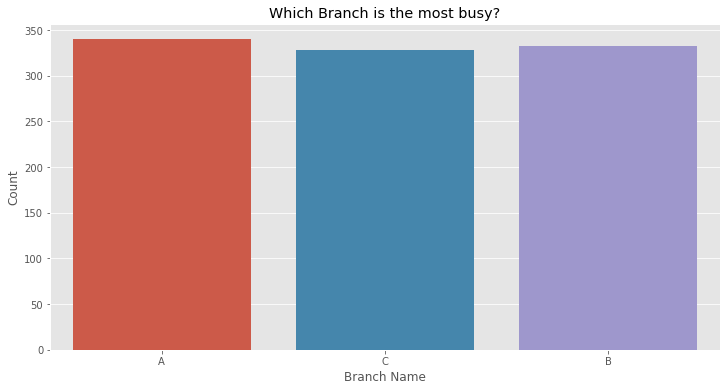

In [28]:
sns.countplot(df['Branch'])
plt.xlabel('Branch Name')
plt.ylabel('Count')
plt.title('Which Branch is the most busy?')
plt.show()

=> There is not much difference in sales across the 3 branches of A, B and C and branch A has slightly more sale than B and C. But in terms of the mean of sale, branch C is a bit higher than the rest of the branches.

- Question 2: Which branch is the most profitable?

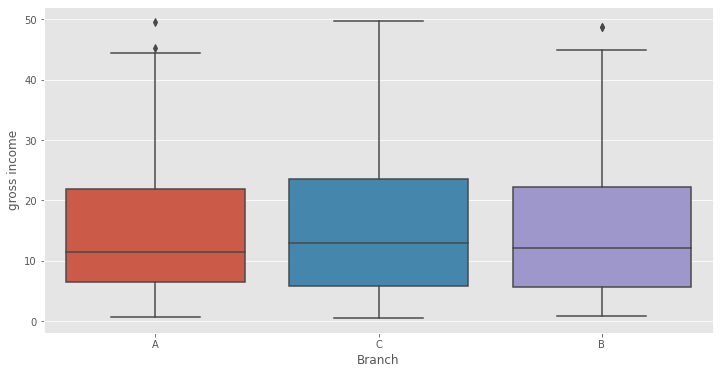

In [45]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

=> Branch C has a slightly higher income than A or B. Though branch A has slightly higher sales than the rest but branch C is the most profitable in terms of gross income.

- Question 3: Get overview of the ratings at each branch

In [27]:
df[['Branch', 'Rating']].groupby('Branch').agg(['mean'])

,Rating
,mean
Branch,
A,7.027059
B,6.818072
C,7.072866


=> We can see that Rating of branch c is the best and it also has the largest total of sales although the number of invoices is less.

- Question 4: What is the overview of unit price of products in each product line?

In [29]:
df[["Product line", "Unit price"]].groupby("Product line"). mean().sort_values(by="Unit price", ascending=False).round(2)

,Unit price
Product line,
Fashion accessories,57.15
Sports and travel,56.99
Food and beverages,56.01
Home and lifestyle,55.32
Health and beauty,54.85
Electronic accessories,53.55


=>Fashion accessories lead the list but the average unit prices are quite close to each other.

-  Question 5: What is product preferences over females and males?

In [30]:
preference_gender = df[["Gender", "Product line", "Quantity"]].groupby(["Gender", "Product line"], as_index=False).sum()
preference_gender.head()

,Gender,Product line,Quantity
0,Female,Electronic accessories,488
1,Female,Fashion accessories,530
2,Female,Food and beverages,514
3,Female,Health and beauty,343
4,Female,Home and lifestyle,498


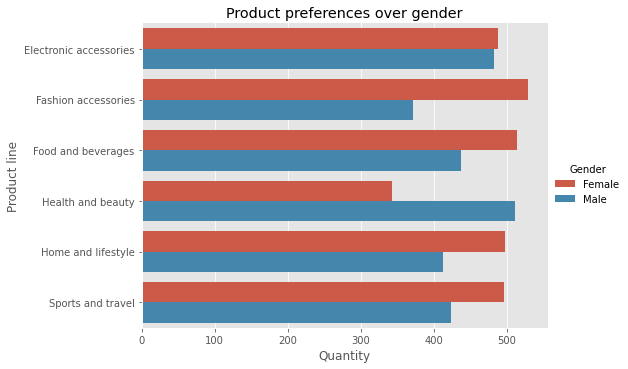

In [31]:
sns.catplot(data=preference_gender, y='Product line', x='Quantity',
            kind='bar', hue='Gender', aspect=1.6, orient='h').set(title="Product preferences over gender")

=>Females purchase more products than men, especially in the fashion accessories category, however, there is a surprise that men purchase more health and beauty items than females. 

- Question 6: Which product line generates most income?

In [56]:
product_income=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
product_income.head()

,Product line,gross income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530


Text(0.5, 1.0, 'Product line and gross income')

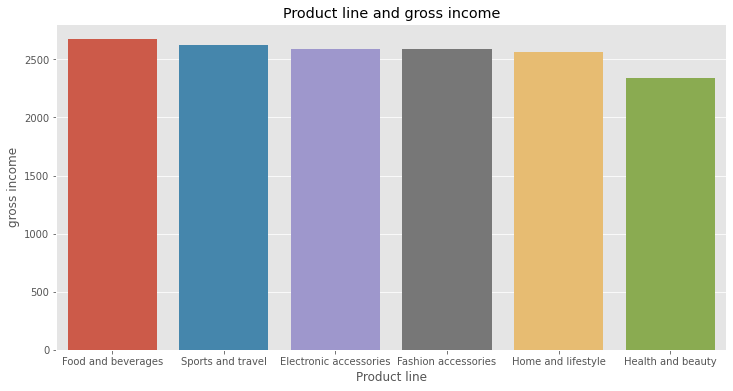

In [58]:
sns.barplot(x='Product line', y='gross income', data=product_income).set_title("Product line and gross income")

=> Gross income is highest in Food and beverages.

- Question 7: Which day of week has is the busiest? 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Daily Sales by Day of the Week')

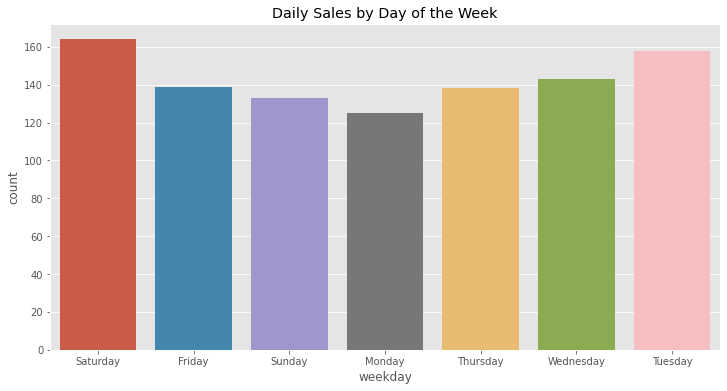

In [63]:
sns.countplot(df['weekday']).set_title("Daily Sales by Day of the Week")

=> Saturday is the most busiest day of the week and Monday welcomes least customers maybe cause it is the working day while Saturday is weekend. 

- Question 8: Which hour of the day is the most busiest?

In [65]:
#convert the data type of the time column to datetime
df["Time"] = pd.to_datetime(df.Time)

In [66]:
df['Hour'] = (df['Time']).dt.hour #create a new columns of hour

In [67]:
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [72]:
df[["Hour", "Quantity"]].groupby("Hour").mean().sort_values(by="Quantity", ascending=False)

,Quantity
Hour,
14,5.963855
19,5.743363
11,5.700000
13,5.679612
12,5.629213
17,5.608108
16,5.454545
20,5.360000
10,5.198020


Text(0.5, 1.0, 'Product Sales per Hour')

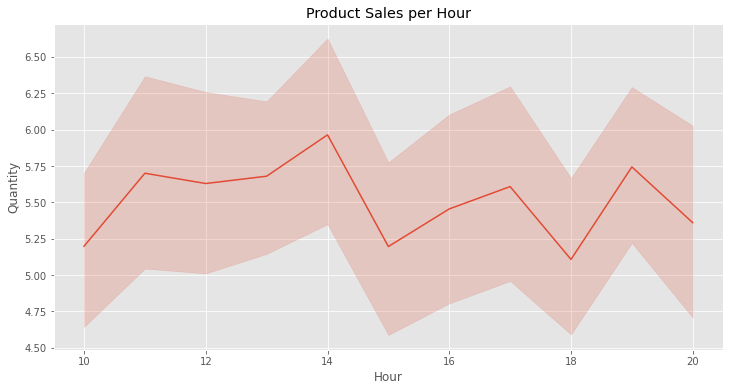

In [71]:
sns.lineplot(x = "Hour", y = "Quantity", data=df).set_title("Product Sales per Hour")


=> 14:00 or 2 pm is the peak of the day. 

- Question 9: Which is the most pouplar payment method used by customers?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Payment method')

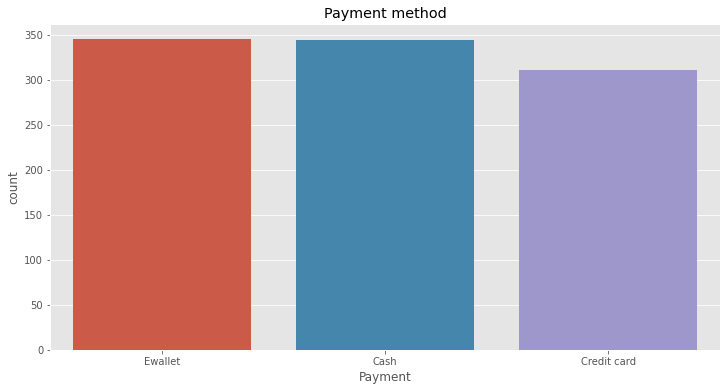

In [73]:
sns.countplot(df["Payment"]).set_title("Payment method")

=> E-wallet is the most popular payment method and then come to cash payment.

- Question 9: Payment type distribution across all the branches

Text(0.5, 1.0, 'Payment method by branch')

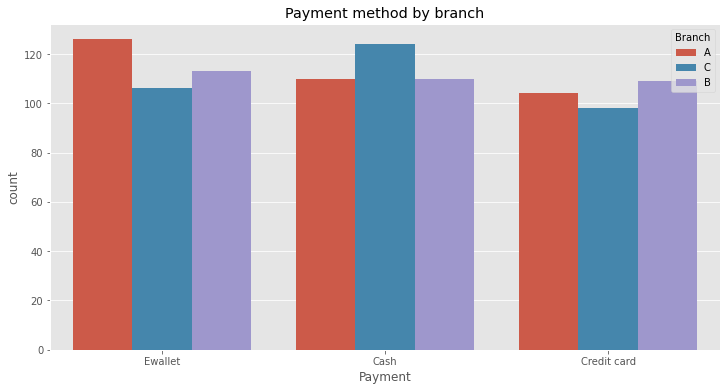

In [74]:
sns.countplot(x = "Payment", hue="Branch", data=df).set_title("Payment method by branch")

=> E-wallet is the most noticeable payment method in branch A while cash is the most used channel in branch C. 

- Question 11: How are our users distributed by gender?

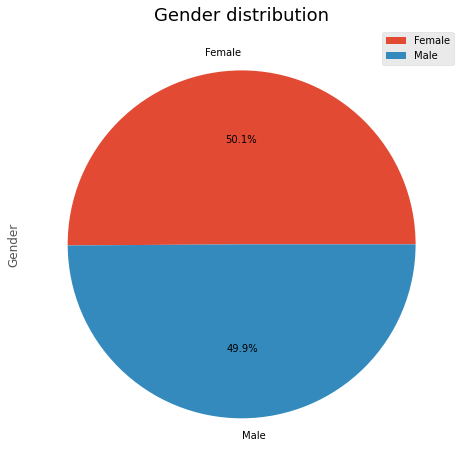

In [75]:
plt.figure(figsize=(10,8))
df["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.legend()
plt.title('Gender distribution', fontsize=18)
plt.show()

=> We have the same count of Male and Female

- Question 12: Find out distribution of customer type over branch


In [76]:
df["Customer type"].nunique()

2

Text(0.5, 1.0, 'Customer type distribution over branch')

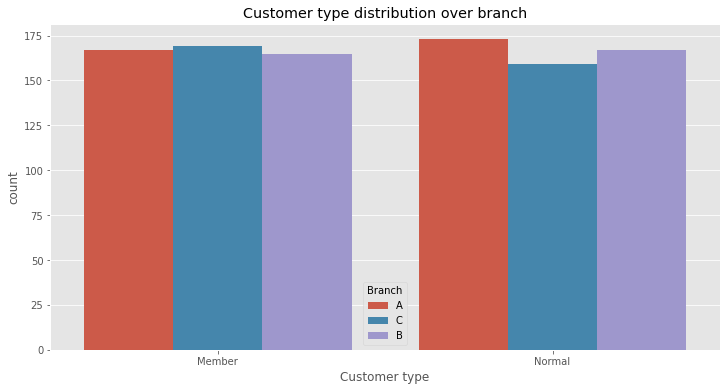

In [77]:
sns.countplot(x = "Customer type", hue = "Branch", data=df).set_title("Customer type distribution over branch")

=> There is no big difference in customer types among three branches. 

- Question 13: Does customer type influences the sales?

In [79]:
df[["Customer type", "Total"]].groupby("Customer type").agg(["sum"])

,Total
,sum
Customer type,
Member,164223.444
Normal,158743.305


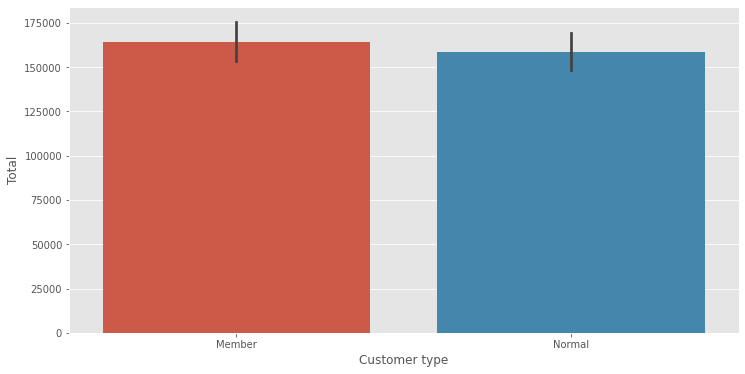

In [81]:
sns.barplot(x = "Customer type", y = "Total", estimator = sum, data = df)

=> Member type leads to slightly higher sale than normal type. 

- Question 14: Highlight the most frequent products

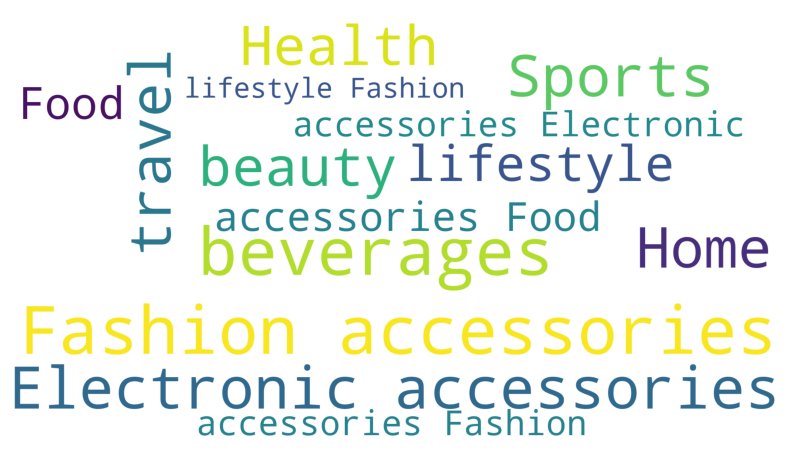

In [82]:
from wordcloud import WordCloud
plt.subplots(figsize=(20, 8))
wordcloud = WordCloud(background_color="white", width=1920, height=1080).generate(" ".join(df["Product line"]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**5. Correlation analysis**

In [84]:
np.round(df.corr(), 2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,-0.01
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.03
Hour,0.01,-0.01,-0.00,-0.00,-0.00,NaN,-0.00,-0.03,1.00


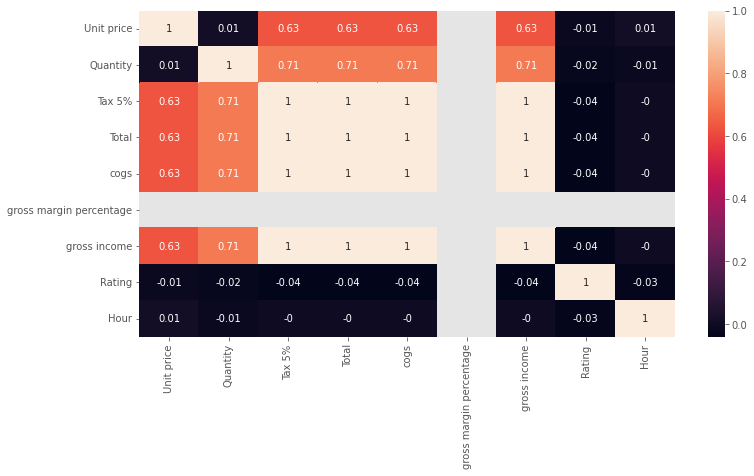

In [85]:
sns.heatmap(np.round(df.corr(), 2), annot = True)

=>Quantity and gross income has very high correlation of 70%. Unit price is positively correlated to tax with 63% correlation.

**6. Brainstorm**

- Branch C is the most profittable one so, it should be chosen to expand. 
- Get to know the importance of digital payment
- Fashion accessories, beverage food and sports create more gross income and lead the top frequent products, therefore, supermarket needs to provide bigger supply of these items. 
- The busiest day of a week is Saturday and the busiest time of a day is 14:00, supermarket should arrange more cashier and staff at this time. 